Nama Anggota: 
- <font color='#EEA7B9'>Muhammad Fadil Maulana Akbar (1301204297)</font> 
- <font color='#C8584D'>Muhammad Rafli Ramadhan (1301200204)</font>
- <font color='#5573A7'>Rahusien Salim (1301201431)</font>
- <font color='#F1DB88'>Shafa Diva Syahira (1301200157)</font>


### Download Dataset

In [ ]:
# download data dari github
!wget https://raw.githubusercontent.com/fadilmr/ProjectBased-ML/main/german_credit.csv

--2023-01-05 13:41:45--  https://raw.githubusercontent.com/fadilmr/ProjectBased-ML/main/german_credit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275923 (269K) [text/plain]
Saving to: ‘german_credit.csv.1’

german_credit.csv.1 100%[===================>] 269.46K  --.-KB/s    in 0.005s  

2023-01-05 13:41:45 (52.6 MB/s) - ‘german_credit.csv.1’ saved [275923/275923]



### Import Library

In [ ]:
# Library Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Library untuk membuat model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Read Data

In [ ]:
# read data dan tampilkan 5 data teratas
df = pd.read_csv('german_credit.csv')
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
# Melihat informasi dari tiap fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

### Pre-Processing

In [ ]:
# Mencari missing value dari tiap fitur
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
# Mencari fitur yang mempunyai tipe data object
categorical_features = df.select_dtypes(include=[np.object]).columns
print(categorical_features)

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')


<ipython-input-32-fd4780211498>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


In [ ]:
df[categorical_features]

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,no credits taken/all credits paid back duly,furniture/equipment,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,no credits taken/all credits paid back duly,others,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,all credits at this bank paid back duly,others,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,no credits taken/all credits paid back duly,furniture/equipment,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [ ]:
# Melihat value unik dari fitur categorical
for col in categorical_features:
    column = col + ": "
    for v in df[col].unique():
        column = column + str(v) + ", "
    print(column)
    print()

status: no checking account, ... < 0 DM, ... >= 200 DM / salary for at least 1 year, 0<= ... < 200 DM, 

credit_history: all credits at this bank paid back duly, no credits taken/all credits paid back duly, existing credits paid back duly till now, delay in paying off in the past, critical account/other credits elsewhere, 

purpose: car (used), others, retraining, furniture/equipment, car (new), business, domestic appliances, radio/television, repairs, vacation, 

savings: unknown/no savings account, ... <  100 DM, 100 <= ... <  500 DM, ... >= 1000 DM, 500 <= ... < 1000 DM, 

employment_duration: < 1 yr, 1 <= ... < 4 yrs, 4 <= ... < 7 yrs, unemployed, >= 7 yrs, 

installment_rate: < 20, 25 <= ... < 35, 20 <= ... < 25, >= 35, 

personal_status_sex: female : non-single or male : single, male : married/widowed, female : single, male : divorced/separated, 

other_debtors: none, guarantor, co-applicant, 

present_residence: >= 7 yrs, 1 <= ... < 4 yrs, 4 <= ... < 7 yrs, < 1 yr, 

property: c

In [ ]:
# Memilih fitur yang akan digunakan.
selected_columns = ['age', 'personal_status_sex', 'job', 'housing', 'savings', 'status', 'amount', 'purpose', 'duration', 'credit_risk']
df_selected = df[selected_columns]
df_selected

,age,personal_status_sex,job,housing,savings,status,amount,purpose,duration,credit_risk
0,21,female : non-single or male : single,skilled employee/official,for free,unknown/no savings account,no checking account,1049,car (used),18,good
1,36,male : married/widowed,skilled employee/official,for free,unknown/no savings account,no checking account,2799,others,9,good
2,23,female : non-single or male : single,unskilled - resident,for free,... < 100 DM,... < 0 DM,841,retraining,12,good
3,39,male : married/widowed,unskilled - resident,for free,unknown/no savings account,no checking account,2122,others,12,good
4,38,male : married/widowed,unskilled - resident,rent,unknown/no savings account,no checking account,2171,others,12,good
...,...,...,...,...,...,...,...,...,...,...
995,21,male : married/widowed,unskilled - resident,for free,unknown/no savings account,no checking account,1987,furniture/equipment,24,bad
996,45,male : married/widowed,skilled employee/official,rent,unknown/no savings account,no checking account,2303,others,24,bad
997,30,male : married/widowed,manager/self-empl./highly qualif. employee,own,... >= 1000 DM,... >= 200 DM / salary for at least 1 year,12680,others,21,bad
998,52,male : married/widowed,manager/self-empl./highly qualif. employee,rent,... >= 1000 DM,... < 0 DM,6468,furniture/equipment,12,bad


Alasan kami memilih fitur tersebut adalah untuk melihat distribusi resiko kredit dengan pekerjaan, status tempat tinggal, jumlah kredit dan tujuan peminjaman dari kreditur.

In [ ]:
# menghapus baris tabungan yang memiliki value unknown karena menyebabkan keambiguan pada data.
index_to_drop = df_selected[df_selected['savings'] == 'unknown/no savings account'].index
df_selected = df_selected.drop(index=index_to_drop)
df_selected

,age,personal_status_sex,job,housing,savings,status,amount,purpose,duration,credit_risk
2,23,female : non-single or male : single,unskilled - resident,for free,... < 100 DM,... < 0 DM,841,retraining,12,good
9,23,female : non-single or male : single,unemployed/unskilled - non-resident,for free,100 <= ... < 500 DM,... < 0 DM,3758,furniture/equipment,24,good
11,24,female : single,skilled employee/official,for free,... < 100 DM,no checking account,6187,car (new),30,good
13,31,male : married/widowed,manager/self-empl./highly qualif. employee,rent,... < 100 DM,... < 0 DM,7582,business,48,good
14,23,female : single,unskilled - resident,for free,... >= 1000 DM,no checking account,1936,furniture/equipment,18,good
...,...,...,...,...,...,...,...,...,...,...
987,20,female : single,skilled employee/official,rent,... < 100 DM,no checking account,674,furniture/equipment,12,bad
992,51,male : married/widowed,skilled employee/official,own,... >= 1000 DM,no checking account,7511,car (new),18,bad
997,30,male : married/widowed,manager/self-empl./highly qualif. employee,own,... >= 1000 DM,... >= 200 DM / salary for at least 1 year,12680,others,21,bad
998,52,male : married/widowed,manager/self-empl./highly qualif. employee,rent,... >= 1000 DM,... < 0 DM,6468,furniture/equipment,12,bad


#### Labelling ordinal data dan Categorical data

In [ ]:
# mengubah label jenis kelamin menjadi data binary.
def S_LabelEncoder(text):
    if text == 'male : divorced/separated' or text == 'male : married/widowed':
        return 'male'
    else:
        return 'female'

# Mengubah fitur yang merupakan ordinal data menjadi data numerik.
# Housing
def H_LabelEncoder(text):
    if text == "for free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

# Job
def J_LabelEncoder(text):
    if text == 'unemployed/unskilled - non-resident':
        return 0
    elif text == 'unskilled - resident':
        return 1
    elif text == 'skilled employee/official':
        return 2
    elif text == 'manager/self-empl./highly qualif. employee':
        return 3

# Savings
def SA_LabelEncoder(text):
    if text == '... <  100 DM':
        return 0
    elif text == '100 <= ... <  500 DM':
        return 1
    elif text == '500 <= ... < 1000 DM':
        return 2 
    elif text == '... >= 1000 DM':
        return 3

# Status
def C_LabelEncoder(text):
    if text == 'no checking account' or text == '... < 0 DM':
        return 0
    elif text == '0<= ... < 200 DM':
        return 1
    elif text == '... >= 200 DM / salary for at least 1 year':
        return 2

df_selected['personal_status_sex'] = df['personal_status_sex'].apply(S_LabelEncoder)
df_selected['housing'] = df['housing'].apply(H_LabelEncoder)
df_selected['job'] = df['job'].apply(J_LabelEncoder)
df_selected['savings'] = df['savings'].apply(SA_LabelEncoder)
df_selected['status'] = df['status'].apply(C_LabelEncoder)

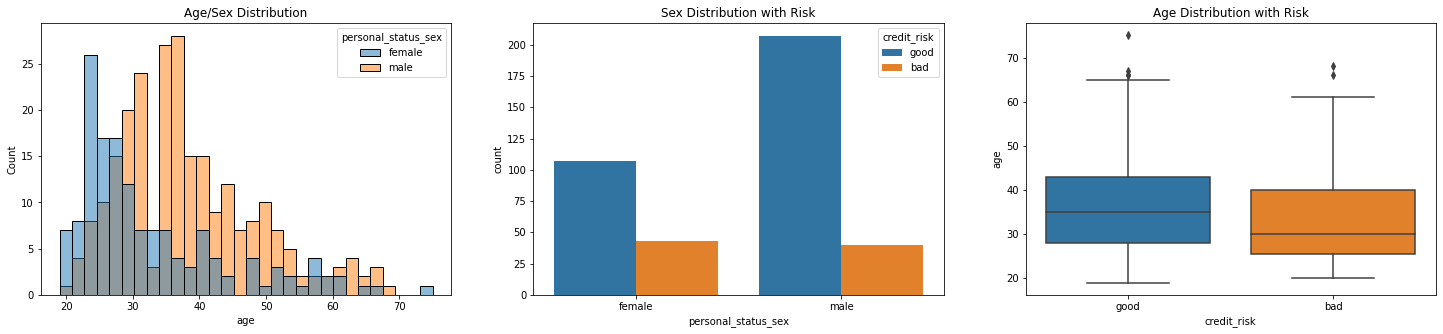

In [ ]:
# grafik untuk melihat distribusi dari umur dan jenis kelamin dengan resiko kredit.
fig, ax = plt.subplots(1,3,figsize=(25,5))
sns.histplot(df_selected, x='age', bins=30, hue="personal_status_sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.countplot(data=df_selected, x="personal_status_sex", hue="credit_risk", ax=ax[1]).set_title("Sex Distribution with Risk");
sns.boxplot(data=df_selected, x='credit_risk', y='age', ax=ax[2]).set_title("Age Distribution with Risk");

Berdasarkan grafik bahwa laki-laki pada umur 30-40 menjadi kreditur terbanyak serta memiliki persentase buruk yang rendah dan umur tidak terlalu berpengaruh pada resiko kredit.

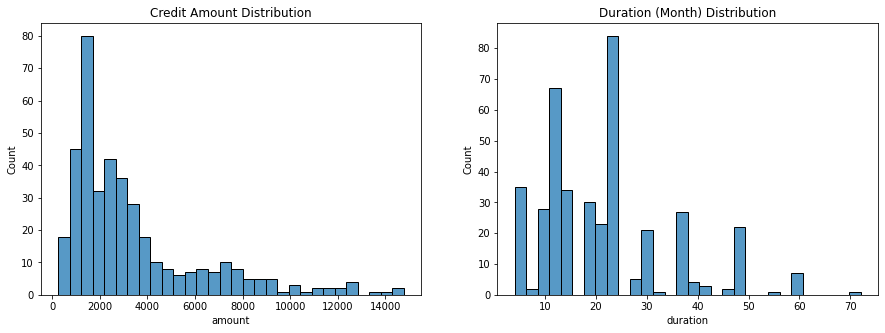

In [ ]:
# grafik distribusi dari jumlah credit yang diminta dan durasi kredit
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_selected, x='amount', bins=30, ax=ax[0]).set_title("Credit Amount Distribution");
sns.histplot(df_selected, x='duration', bins=30, ax=ax[1]).set_title("Duration (Month) Distribution");

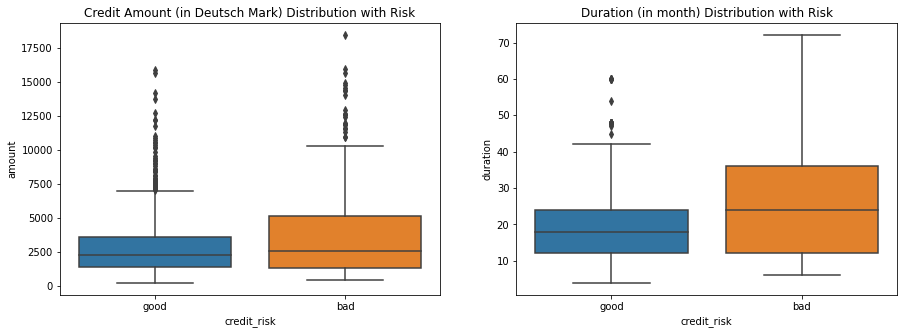

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='credit_risk', y='amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='credit_risk', y='duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

Berdasarkan grafik dan boxplot dapat kita simpulkan bahwa semakin banyak jumlah kredit yang dipinjam dan semakin lama durasi nya, maka akan semakin tinggi resiko nya.

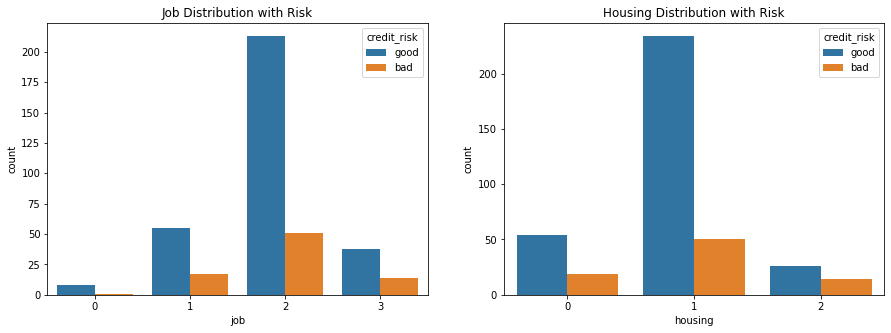

In [ ]:
# grafik distribusi pekerjaan dan status tempat tinggal dari kreditur.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_selected, x="job", hue="credit_risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df_selected, x="housing", hue="credit_risk", ax=ax[1]).set_title("Housing Distribution with Risk");

kreditur terbanyak adalah job dengan level 2 tetapi job tidak terlalu mempengaruhi resiko, lalu kreditur yang sedang menyewa tempat tinggal juga menjadi kreditur terbanyak dengan resiko yang baik

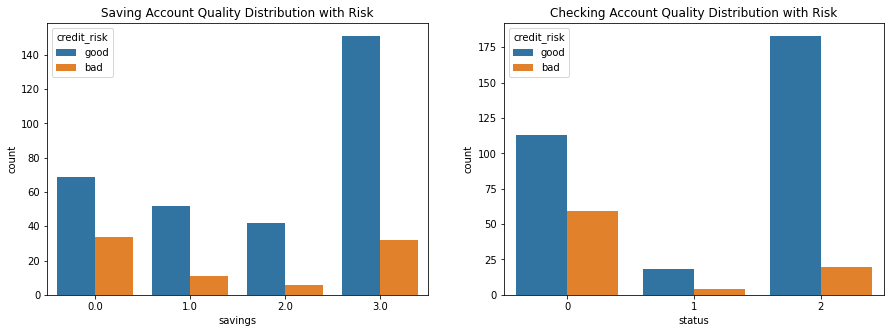

In [ ]:
# grafik distribusi dari akun tabungan dan giro dari kreditur.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_selected, x="savings", hue="credit_risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=df_selected, x="status", hue="credit_risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

Setengah dari kreditur yang tidak mempunyai tabungan dan tabungan giro merupakan kreditur dengan resiko yang tinggi.

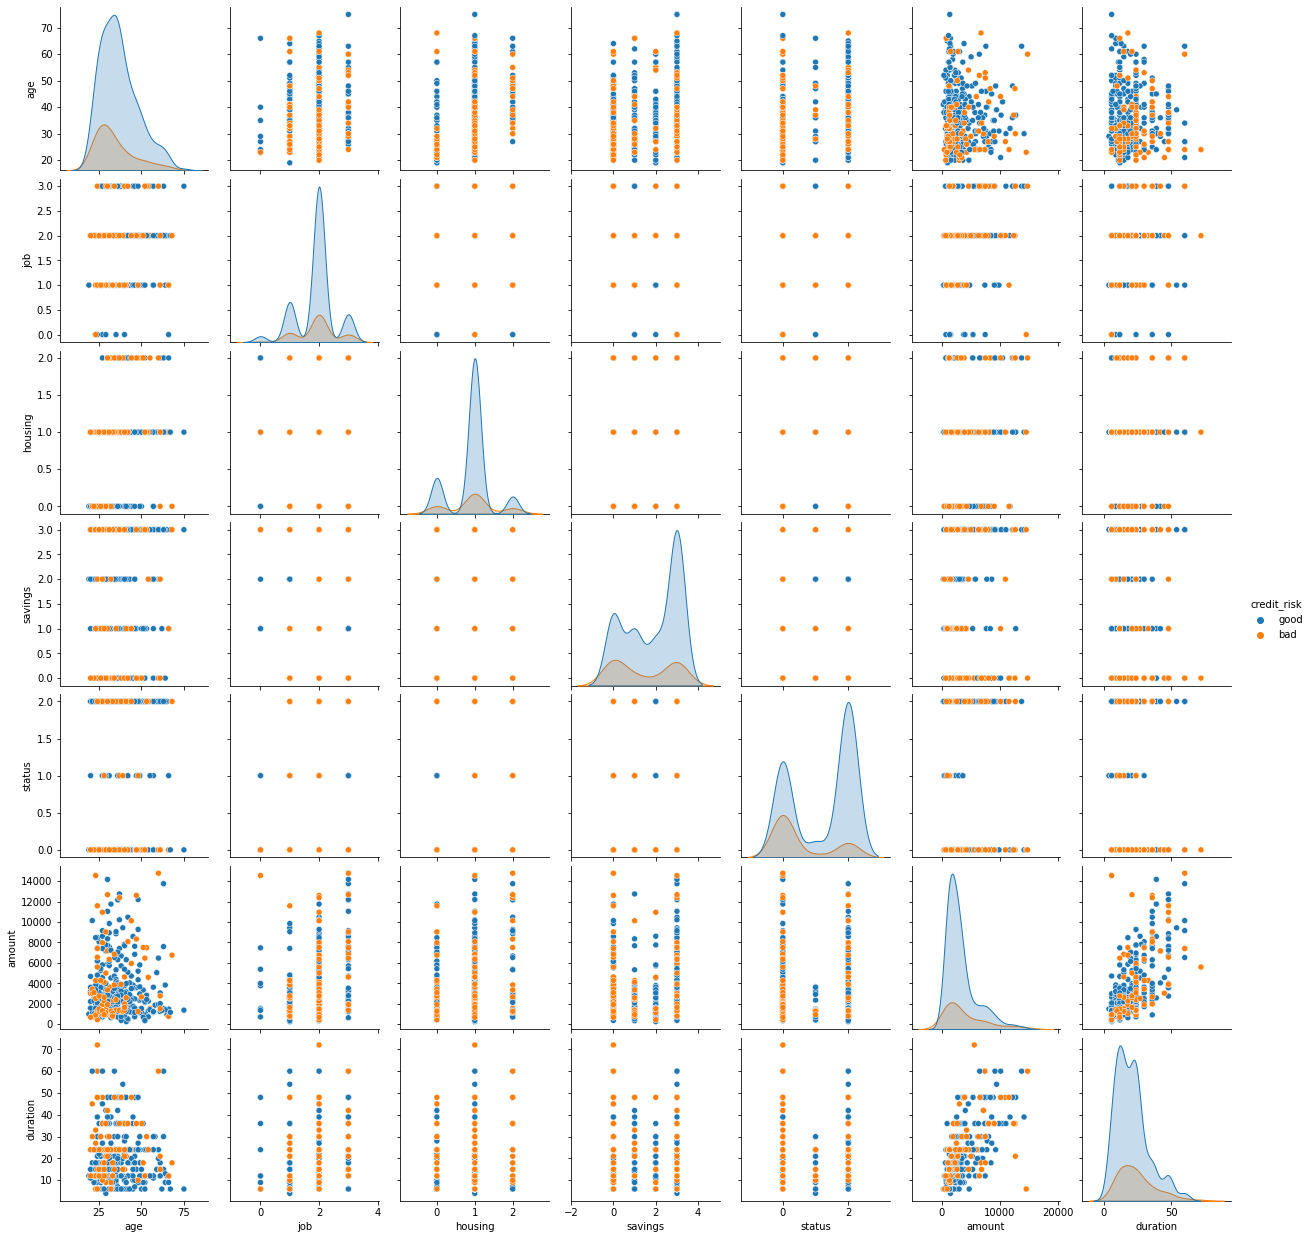

In [ ]:
sns.pairplot(df_selected, hue="credit_risk")

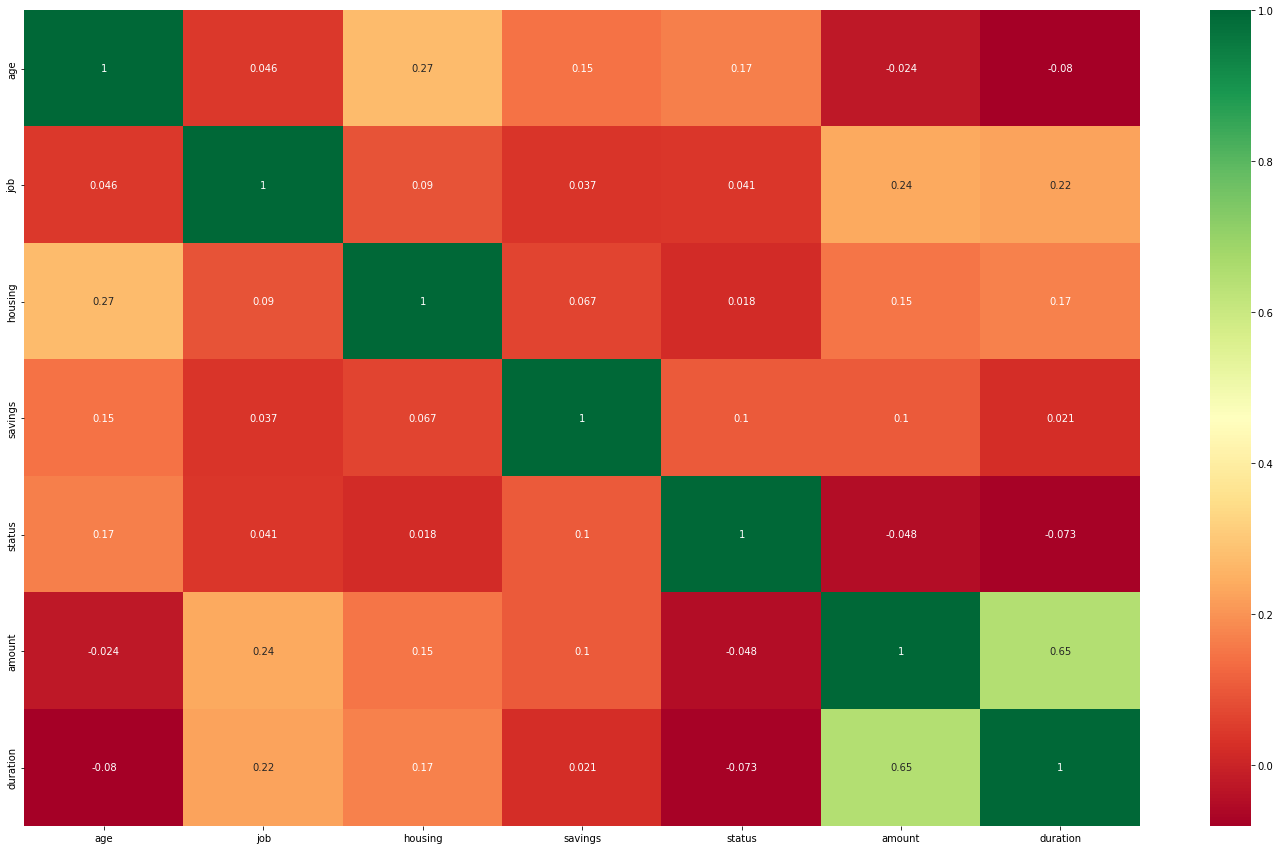

In [ ]:
corr = df_selected.corr()
top_corr_features = corr.index
plt.figure(figsize=(25,15))
g=sns.heatmap(corr,annot=True,cmap="RdYlGn")

durasi dan jumlah uang peminjaman memiliki korelasi terbesar.

In [ ]:
# melakukan labelling untuk data categorical
categorical = ['personal_status_sex', 'purpose', 'credit_risk']
def categorical_Labelling(df, categorical):
    for col in categorical:
        le = LabelEncoder()
        le.fit(df[col])
        df[col] = le.transform(df[col])
    return df
df_labelled = categorical_Labelling(df_selected, categorical)
df_labelled

,age,personal_status_sex,job,housing,savings,status,amount,purpose,duration,credit_risk
2,23,0,1,0,0.0,0,841,8,12,1
9,23,0,0,0,1.0,0,3758,4,24,1
11,24,0,2,0,0.0,0,6187,1,30,1
13,31,1,3,1,0.0,0,7582,0,48,1
14,23,0,1,0,3.0,0,1936,4,18,1
...,...,...,...,...,...,...,...,...,...,...
987,20,0,2,1,0.0,0,674,4,12,0
992,51,1,2,2,3.0,0,7511,1,18,0
997,30,1,3,2,3.0,2,12680,5,21,0
998,52,1,3,1,3.0,0,6468,4,12,0


### Model

In [ ]:
# Memisahkan target dengan dataset
x = df_labelled.drop('credit_risk', axis = 1)
y = df_labelled['credit_risk']
# Split dataset sebesar 70/30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
# Menggunakan StandardScaler untuk scaling dataset.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Menggunakan Principal Component Analysis untuk mereduksi jumlah dimensi dari data
pca = PCA(n_components=4)

x_train_reduced = pca.fit_transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)

(277, 4)

In [ ]:
# Import Library Bagging dan Decision Tree.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt = DecisionTreeClassifier()

# Membuat model Bagging dengan 50 Decision Tree / sub model. 
bagging = BaggingClassifier(base_estimator=dt, n_estimators=50, bootstrap=True)

# Melakukan training model dengan dataset yang sudah direduksi
bagging.fit(x_train_scaled, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)

In [ ]:
# melakukan prediksi dengan data test yang sudah direduksi
y_pred = bagging.predict(x_test_scaled)

((120,), (120,))

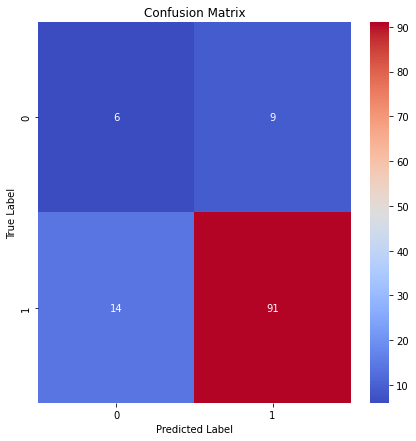

In [ ]:
# import library untuk menghitung confusion matrix
from sklearn.metrics import confusion_matrix

# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# grafik confusion matrix.
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# import library untuk menghitung akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision : {precision_score(y_test, y_pred)*100:.2f}%')
print(f'Recall : {recall_score(y_test, y_pred)*100:.2f}%')

Accuracy : 80.83%
Precision : 91.00%
Recall : 86.67%


In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier()
baggingann = BaggingClassifier(base_estimator=ann, n_estimators=10, bootstrap=True)


baggingann.fit(x_train_scaled, y_train)

y_pred_ann = baggingann.predict(x_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

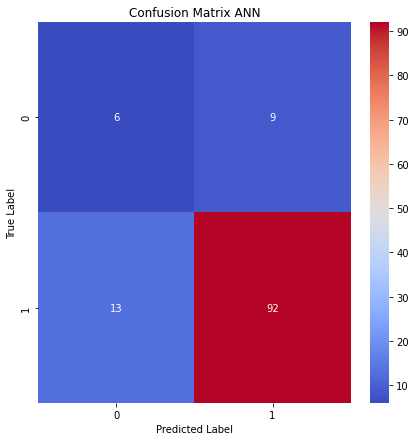

In [ ]:
# import library untuk menghitung confusion matrix
from sklearn.metrics import confusion_matrix

# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

# grafik confusion matrix.
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax)
plt.title('Confusion Matrix ANN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# import library untuk menghitung akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy : {accuracy_score(y_test, y_pred_ann)*100:.2f}%')
print(f'Precision : {precision_score(y_test, y_pred_ann)*100:.2f}%')
print(f'Recall : {recall_score(y_test, y_pred_ann)*100:.2f}%')

Accuracy : 81.67%
Precision : 91.09%
Recall : 87.62%
